# **Setup**

* https://www.youtube.com/watch?v=KgCgpCIOkIs&t=20s

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
Color_Palette = sns.color_palette('BrBG')
Color_Palette

[(0.6313725490196078, 0.3951557093425605, 0.09573241061130335),
 (0.8572856593617839, 0.7257977700884274, 0.4471357170319107),
 (0.9636293733179546, 0.9237985390234525, 0.8185313341022683),
 (0.8299115724721262, 0.9294886582083814, 0.9152633602460593),
 (0.4615916955017304, 0.7748558246828146, 0.7299500192233758),
 (0.0878892733564014, 0.479123414071511, 0.44775086505190315)]

In [41]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

# **Data Import**

In [2]:
df = pd.read_csv("Diwali Sales Data.csv",encoding='unicode_escape')

print(df.shape)
df.head()

(11251, 15)


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [3]:
# Check Columns
print('All Columns')
print(df.columns,'\n')

# Numeric Columns
print('Numeric Columns')
print(df.select_dtypes('number').columns,'\n')

# Categoric Columns
print('Categoric Columns')
print(df.select_dtypes('object').columns,'\n')

All Columns
Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object') 

Numeric Columns
Index(['User_ID', 'Age', 'Marital_Status', 'Orders', 'Amount', 'Status',
       'unnamed1'],
      dtype='object') 

Categoric Columns
Index(['Cust_name', 'Product_ID', 'Gender', 'Age Group', 'State', 'Zone',
       'Occupation', 'Product_Category'],
      dtype='object') 



In [4]:
# Check Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


# **Data Preparation**

## **Missing Values**

In [6]:
# Check Missing Values
print(df.isna().sum())

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64


In [7]:
# Check Rows With Missing Values
df[df.isna()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Drop Status & unnamed1 Column
print('Data Shape Before: ',df.shape)

df.drop(['Status','unnamed1'],axis=1,inplace=True)
print('Data Shape After: ',df.shape)

Data Shape Before:  (11251, 15)
Data Shape After:  (11251, 13)


In [9]:
# Check Missing Value Count
df.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [11]:
# Check Missing Values
df[df.isna()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Check Missing Values
df[df['Amount'].isna()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
14,1003858,Cano,P00293742,M,46-50,46,1,Madhya Pradesh,Central,Hospitality,Auto,3,NaN
16,1005447,Amy,P00275642,F,46-50,48,1,Andhra Pradesh,Southern,IT Sector,Auto,3,NaN
109,1005265,Sakshi,P00296242,F,46-50,48,1,Delhi,Central,Banking,Footwear & Shoes,1,NaN
111,1005261,Apoorva,P00057942,F,36-45,41,1,Delhi,Central,IT Sector,Footwear & Shoes,2,NaN
184,1005538,Kartik,P00269542,F,46-50,49,1,Karnataka,Southern,Banking,Footwear & Shoes,1,NaN
293,1000326,Jonathan,P00120542,M,51-55,53,0,Gujarat,Western,IT Sector,Footwear & Shoes,3,NaN
344,1002507,Lakshmi,P00045842,F,26-35,35,1,Gujarat,Western,Chemical,Furniture,1,NaN
345,1004498,Srishti,P00030842,F,51-55,55,0,Delhi,Central,Textile,Footwear & Shoes,1,NaN
452,1004601,Gaurav,P00014442,F,36-45,40,1,Madhya Pradesh,Central,Hospitality,Food,4,NaN


In [13]:
# Remove Missing Values
print('Data Shape Before: ',df.shape)

df.dropna(inplace=True)
print('Data Shape After: ',df.shape)

Data Shape Before:  (11251, 13)
Data Shape After:  (11239, 13)


## **Duplicate Values**

In [14]:
# Check Duplicate Values
df[df.duplicated(keep=False)]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
18,1001883,Praneet,P00029842,M,51-55,54,1,Uttar Pradesh,Central,Hospitality,Auto,1,23568.0
19,1001883,Praneet,P00029842,M,51-55,54,1,Uttar Pradesh,Central,Hospitality,Auto,1,23568.0
4403,1004725,Jackson,P00150842,F,36-45,37,1,Maharashtra,Western,Hospitality,Electronics & Gadgets,4,9859.0
4404,1004725,Jackson,P00150842,F,36-45,37,1,Maharashtra,Western,Hospitality,Electronics & Gadgets,4,9859.0
5702,1003208,Bowman,P00171642,F,26-35,31,0,Bihar,Eastern,Agriculture,Electronics & Gadgets,4,8088.0
5703,1003208,Bowman,P00171642,F,26-35,31,0,Bihar,Eastern,Agriculture,Electronics & Gadgets,4,8088.0
5907,1001260,Dheeraj,P00344042,M,26-35,28,0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4,8015.0
5908,1001260,Dheeraj,P00344042,M,26-35,28,0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4,8015.0
6172,1001325,Reese,P00111742,F,26-35,27,1,Gujarat,Western,Construction,Electronics & Gadgets,3,7923.0
6173,1001325,Reese,P00111742,F,26-35,27,1,Gujarat,Western,Construction,Electronics & Gadgets,3,7923.0


In [15]:
# Remove Duplicate Values (Second Instance & Onwards)
print('Data Shape Before: ',df.shape)

df = df[~df.duplicated()]
print('Data Shape Before: ',df.shape)

Data Shape Before:  (11239, 13)
Data Shape Before:  (11231, 13)


## **Column Rename**

In [16]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [17]:
df.rename({'Age Group':'Age_Group'},axis=1,inplace=True)
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age_Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

## **DType Conversion**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11231 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11231 non-null  int64  
 1   Cust_name         11231 non-null  object 
 2   Product_ID        11231 non-null  object 
 3   Gender            11231 non-null  object 
 4   Age_Group         11231 non-null  object 
 5   Age               11231 non-null  int64  
 6   Marital_Status    11231 non-null  int64  
 7   State             11231 non-null  object 
 8   Zone              11231 non-null  object 
 9   Occupation        11231 non-null  object 
 10  Product_Category  11231 non-null  object 
 11  Orders            11231 non-null  int64  
 12  Amount            11231 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [19]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age_Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


# **Data Exploration**

## **Gender Count Plot**

In [20]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age_Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

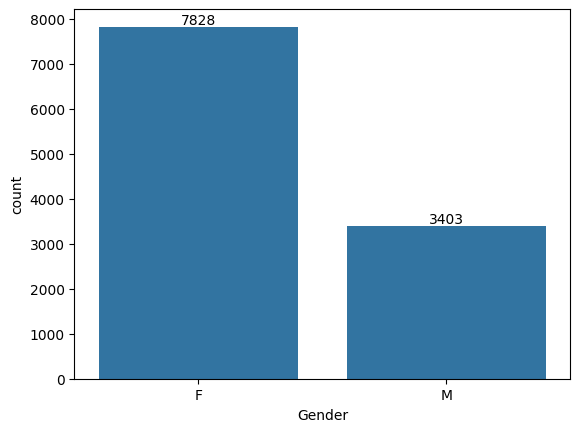

In [42]:
# Gender Count Plot
plot_01 = sns.countplot(data=df,x='Gender')

# Add Annotations
for bar in plot_01.containers:
    plot_01.bar_label(bar)

## **Gender Sales Amount**

In [29]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age_Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [39]:
result_00 = df.groupby(by='Gender',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
result_00

,Gender,Amount
0,F,74307682.43
1,M,31871146.00


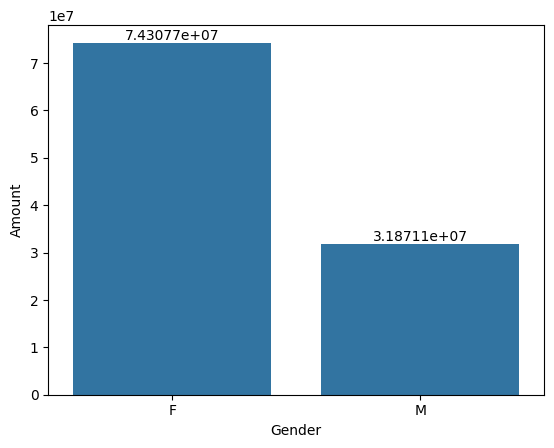

In [45]:
plot_02 = sns.barplot(result_00,x=result_00.Gender,y=result_00.Amount)

# Add Annotations
for bar in plot_02.containers:
    plot_02.bar_label(bar)

## **Age-Group Count Plot**

<Axes: xlabel='Age_Group', ylabel='count'>

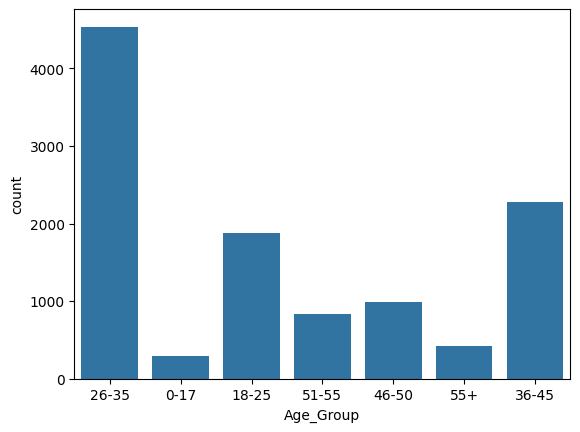

In [48]:
sns.countplot(data=df,x='Age_Group')

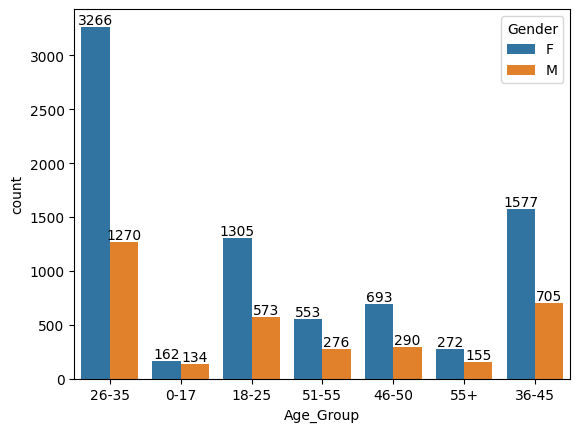

In [49]:
# Gender Wise Split 
plot_03 = sns.countplot(data=df,x='Age_Group',hue='Gender')

for bar in plot_03.containers:
    plot_03.bar_label(bar)

## **Age Group Wise Sales Amount**

In [54]:
result_01 = df.groupby(by='Age_Group',as_index=False)['Amount'].sum()
result_01['Amount_Lacs'] = result_01['Amount']/100000
result_01

,Age_Group,Amount,Amount_Lacs
0,0-17,2699653.00,26.996530
1,18-25,17235530.00,172.355300
2,26-35,42581768.94,425.817689
3,36-45,22135136.49,221.351365
4,46-50,9207844.00,92.078440
5,51-55,8237909.00,82.379090
6,55+,4080987.00,40.809870


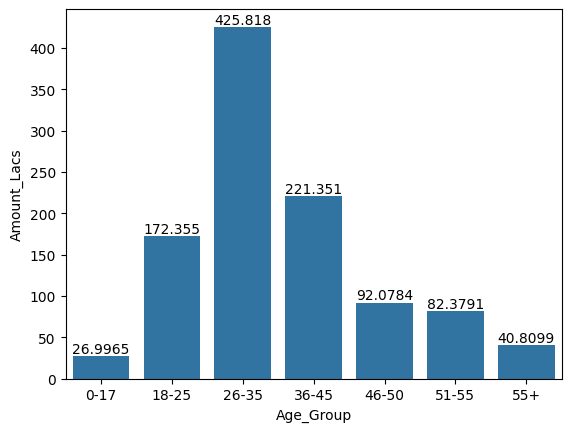

In [58]:
# Plot Sales Amount
plot_04 = sns.barplot(result_01,x='Age_Group',y='Amount_Lacs')

for bar in plot_04.containers:
    plot_04.bar_label(bar)

In [60]:
# Conclusion
# Age Group 18-45 contribute significantly to the sales

## **State Wise Count Plot**

In [61]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age_Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [77]:
df['State'].value_counts()

State
Uttar Pradesh       1942
Maharashtra         1522
Karnataka           1304
Delhi               1104
Madhya Pradesh       921
Andhra Pradesh       811
Himachal Pradesh     608
Kerala               453
Haryana              451
Bihar                433
Gujarat              426
Jharkhand            380
Uttarakhand          320
Rajasthan            231
Punjab               200
Telangana            125
Name: count, dtype: int64

In [97]:
result_02 = df.groupby(by='State',as_index=False).agg({'Orders':('count'),'Amount':('sum')}) \
    .sort_values(by='Orders',ascending=False)
result_02['Amount_Lacs'] = (result_02['Amount']/100000).astype('int')
result_02

,State,Orders,Amount,Amount_Lacs
14,Uttar Pradesh,1942,19346055.00,193
10,Maharashtra,1522,14404467.00,144
7,Karnataka,1304,13523540.00,135
2,Delhi,1104,11603819.45,116
9,Madhya Pradesh,921,8101142.00,81
0,Andhra Pradesh,811,8037146.99,80
5,Himachal Pradesh,608,4963368.00,49
8,Kerala,453,3894491.99,38
4,Haryana,451,4217871.00,42
1,Bihar,433,4014669.00,40


C:\Users\aksha\AppData\Local\Temp\ipykernel_15644\277408167.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot_05.set_xticklabels(plot_05.get_xticklabels(), rotation=45, horizontalalignment='right')


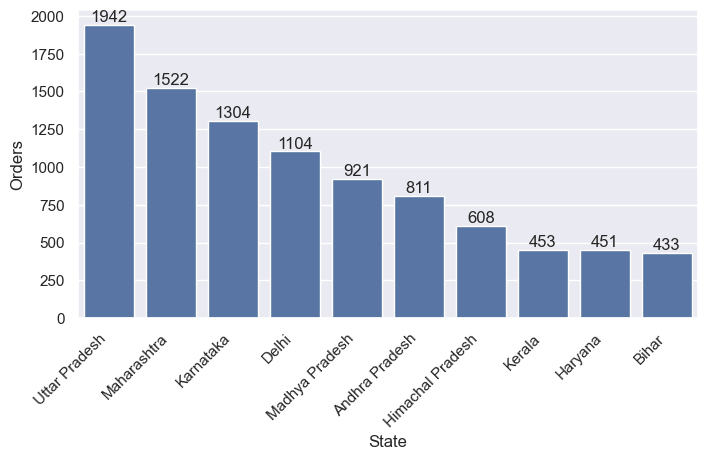

In [93]:
# State Wise Order Count Split
plot_05 = sns.barplot(data=result_02.head(10),x='State',y='Orders')
sns.set(rc={'figure.figsize':(8,4)})
plot_05.set_xticklabels(plot_05.get_xticklabels(), rotation=45, horizontalalignment='right')

for bar in plot_05.containers:
    plot_05.bar_label(bar)

C:\Users\aksha\AppData\Local\Temp\ipykernel_15644\1797674797.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot_06.set_xticklabels(plot_06.get_xticklabels(), rotation=45, horizontalalignment='right')


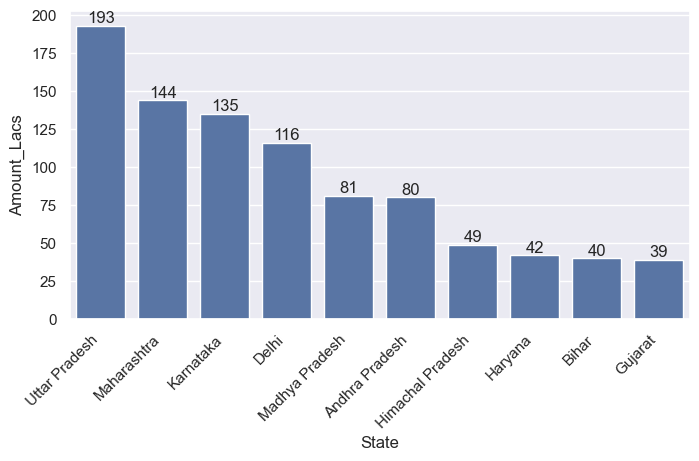

In [98]:
# State Wise Order Count Split
plot_06 = sns.barplot(data=result_02.sort_values('Amount_Lacs',ascending=False).head(10),x='State',y='Amount_Lacs')
sns.set(rc={'figure.figsize':(8,4)})
plot_06.set_xticklabels(plot_06.get_xticklabels(), rotation=45, horizontalalignment='right')

for bar in plot_06.containers:
    plot_06.bar_label(bar)

## **Marital Status**

In [99]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age_Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [100]:
df['Marital_Status'].value_counts()

Marital_Status
0    6514
1    4717
Name: count, dtype: int64

In [101]:
result_03 = df.groupby(by='Marital_Status',as_index=False).agg({'Orders':('count'),'Amount':('sum')}) \
    .sort_values(by='Orders',ascending=False)
result_03['Amount_Lacs'] = (result_03['Amount']/100000).astype('int')
result_03

,Marital_Status,Orders,Amount,Amount_Lacs
0,0,6514,62098736.44,620
1,1,4717,44080091.99,440


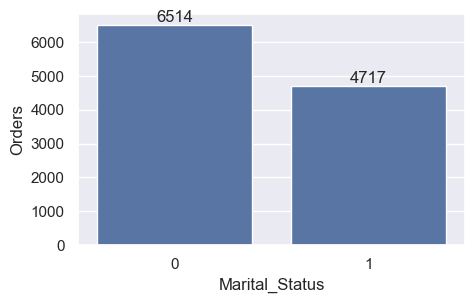

In [108]:
# State Wise Order Count Split
plot_07 = sns.barplot(data=result_03.sort_values('Orders',ascending=False).head(10),x='Marital_Status',y='Orders')
sns.set(rc={'figure.figsize':(3,5)})
# plot_07.set_xticklabels(plot_07.get_xticklabels(), rotation=45, horizontalalignment='right')

for bar in plot_07.containers:
    plot_07.bar_label(bar)

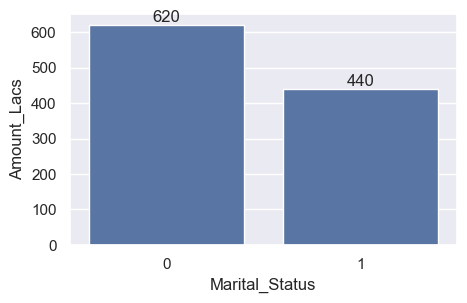

In [110]:
# State Wise Amount Sum Split
plot_08 = sns.barplot(data=result_03.sort_values('Amount_Lacs',ascending=False).head(10),x='Marital_Status',y='Amount_Lacs')
sns.set(rc={'figure.figsize':(3,5)})
# plot_08.set_xticklabels(plot_08.get_xticklabels(), rotation=45, horizontalalignment='right')

for bar in plot_08.containers:
    plot_08.bar_label(bar)

## **Occupation**

In [111]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age_Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [112]:
df['Occupation'].value_counts()

Occupation
IT Sector          1581
Healthcare         1408
Aviation           1309
Banking            1137
Govt                854
Hospitality         700
Media               637
Automobile          565
Chemical            541
Lawyer              531
Retail              501
Food Processing     423
Construction        413
Textile             349
Agriculture         282
Name: count, dtype: int64

In [113]:
result_04 = df.groupby(by='Occupation',as_index=False).agg({'Orders':('count'),'Amount':('sum')}) \
    .sort_values(by='Orders',ascending=False)
result_04['Amount_Lacs'] = (result_04['Amount']/100000).astype('int')
result_04

,Occupation,Orders,Amount,Amount_Lacs
10,IT Sector,1581,14741862.00,147
8,Healthcare,1408,13034587.49,130
2,Aviation,1309,12599994.00,125
3,Banking,1137,10770610.95,107
7,Govt,854,8517212.00,85
9,Hospitality,700,6337633.00,63
12,Media,637,6295832.99,62
1,Automobile,565,5368596.00,53
4,Chemical,541,5297436.00,52
11,Lawyer,531,4981665.00,49


## **Product_Category**

In [114]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age_Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [117]:
result_05 = df.groupby(by='Product_Category',as_index=False).agg({'Orders':('sum'),'Amount':('sum')}) \
    .sort_values(by='Orders',ascending=False)
result_05['Amount_Lacs'] = (result_05['Amount']/100000).astype('int')
result_05

,Product_Category,Orders,Amount,Amount_Lacs
3,Clothing & Apparel,6627,16484472.00,164
6,Food,6110,33933883.50,339
5,Electronics & Gadgets,5208,15607657.00,156
7,Footwear & Shoes,2646,15575209.45,155
11,Household items,1331,1569337.00,15
1,Beauty,1086,1959484.00,19
9,Games & Toys,940,4331694.00,43
8,Furniture,889,5440051.99,54
14,Sports Products,870,3635933.00,36
13,Pet Care,536,482277.00,4


## **Zone**

In [116]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age_Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [119]:
df['Zone'].value_counts()

Zone
Central     4287
Southern    2693
Western     1948
Northern    1490
Eastern      813
Name: count, dtype: int64

In [121]:
result_06 = df.groupby(by='Zone',as_index=False).agg({'Orders':('sum'),'Amount':('sum')}) \
    .sort_values(by='Orders',ascending=False)
result_06['Amount_Lacs'] = (result_06['Amount']/100000).astype('int')
result_06

,Zone,Orders,Amount,Amount_Lacs
0,Central,10619,41571960.45,415
3,Southern,6740,26606668.98,266
4,Western,4861,18342626.00,183
2,Northern,3724,12616448.00,126
1,Eastern,2011,7041125.00,70
